In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from numpy import pi, sin, imag, real, abs, real, sqrt

### Load the data (from measurements)

First download the [meas_data.npz](https://ant-novak.com/pages/speaker_params/meas_data.npz) file.

In [3]:
npzfile = np.load('meas_data.npz')
frequencies = npzfile['frequencies']
# frequencies ... 648 frequencies logarithmically spaced between 10~Hz and 20~kHz
U = npzfile['U']
# U ... complex vector of 648 values, each value corresponding to voltage (amplitude and phase) at the given frequency
I = npzfile['I']
# I ... complex vector of 648 values, each value corresponding to current (amplitude and phase) at the given frequency
V = npzfile['V']
# V ... complex vector of 648 values, each value corresponding to velocity (amplitude and phase) at the given frequency


### Input Impedance

In [4]:
Z = U/I

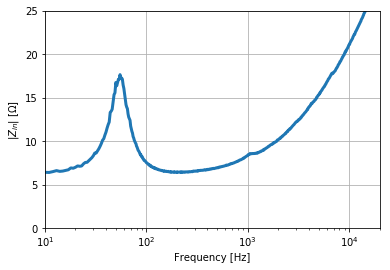

In [5]:
plt.semilogx(frequencies, abs(Z), linewidth=3);
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('|$Z_{in}$| [$\Omega$]')
plt.xlim([10, 20e3])
plt.ylim([0, 25]);

### $Bl$ estimation

#### loop through Bl to get the voice-coil impedance $Z_e$ flat

In the Thiele-Small model, the input impedance is

$$Z_{in}(\omega) = R_e + j \omega L_e + Bl \dfrac{V(\omega)}{I(\omega)}$$.

In a more general sense, where the voice-coil impedance is expressed as $Z_e(\omega)$

$$Z_{in}(\omega) = Z_e(\omega) + Bl \dfrac{V(\omega)}{I(\omega)}$$

The voice-coil impedance $Z_e(\omega)$ is then

$$Z_e(\omega) = Z_{in}(\omega) - Bl \dfrac{V(\omega)}{I(\omega)}$$

The voice-coil impedance $Z_e(\omega)$ has no reason to exhibit any kind of resonance at low frequencies. The resonance behavior is due to the mechanical part, in other words due to the term $Bl \dfrac{V(\omega)}{I(\omega)}$. Consequently, we can estimate the $Bl$ value by arbitrarily choosing the estimated value $\overline{Bl}$ that minimizes the resonant behavior of $Z_e(\omega)$, as shown in the following code.


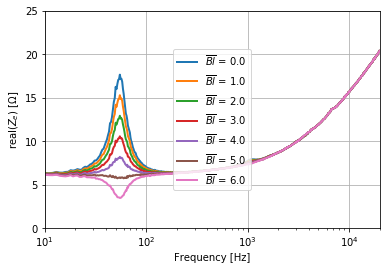

In [6]:
# real part test
test_Bl = np.arange(0,7,1)
for Bl in test_Bl:
    Zel = Z - Bl*V/I
    plt.semilogx(frequencies, real(Zel), linewidth=2)

plt.legend(["$\overline{Bl}$ = %.1f" % x for x in test_Bl], loc='center')
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('real($Z_e$) [$\Omega$]')
plt.xlim([10, 20_000])
plt.ylim([0, 25]);

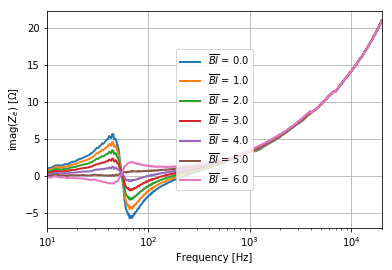

In [7]:
# imaginary part test
test_Bl = np.arange(0,7,1)
for Bl in test_Bl:
    Zel = Z - Bl*V/I
    plt.semilogx(frequencies, imag(Zel), linewidth=2)

plt.legend(["$\overline{Bl}$ = %.1f" % x for x in test_Bl], loc='center')
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('imag($Z_e$) [$\Omega$]')
plt.xlim([10, 20_000]);

Now we know that $Bl$ should be somwhere beween 4 and 5, so we narow the $Bl$ search

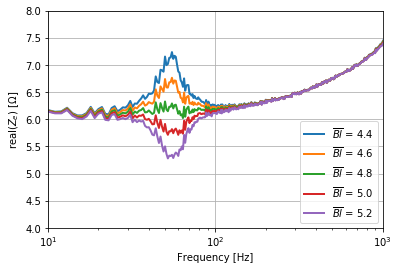

In [8]:
# real part test
test_Bl = np.arange(4.4,5.4,0.2)
for Bl in test_Bl:
    Zel = Z - Bl*V/I
    plt.semilogx(frequencies, real(Zel), linewidth=2)

plt.legend(["$\overline{Bl}$ = %.1f" % x for x in test_Bl], loc='lower right')
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('real($Z_e$) [$\Omega$]')
plt.xlim([10, 1000])
plt.ylim([4, 8]);

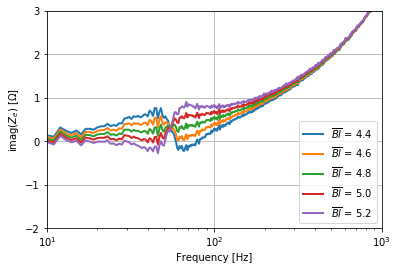

In [9]:
# imaginary part test
test_Bl = np.arange(4.4,5.4,0.2)
for Bl in test_Bl:
    Zel = Z - Bl*V/I
    plt.semilogx(frequencies, imag(Zel), linewidth=2)

plt.legend(["$\overline{Bl}$ = %.1f" % x for x in test_Bl], loc='lower right')
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('imag($Z_e$) [$\Omega$]')
plt.xlim([10, 1000])
plt.ylim([-2, 3]);

### choose the best Bl

In [10]:
Bl = 4.8

## Voice-coil impedance Ze

In [11]:
Ze = Z - Bl*V/I

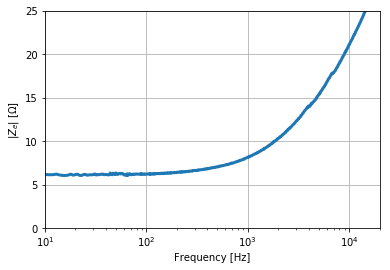

In [12]:
plt.semilogx(frequencies, abs(Ze), linewidth=3)
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('|$Z_e$| [$\Omega$]')
plt.xlim([10, 20e3])
plt.ylim([0, 25]);

### real part of Ze (should equal Re)

In [13]:
Re = np.real(Ze)

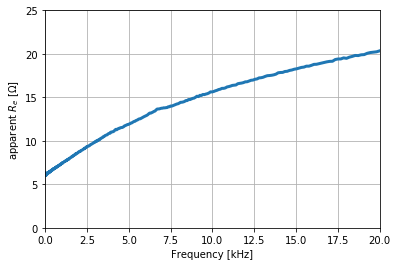

In [14]:
plt.plot(frequencies/1000, Re, linewidth=3)
plt.grid(True)
plt.xlabel('Frequency [kHz]')
plt.ylabel('apparent $R_e$ [$\Omega$]')
plt.xlim([0, 20])
plt.ylim([0, 25]);

### imag part of Ze over omega (should be Le)

In [15]:
omega = 2*np.pi*frequencies

In [16]:
Le = np.imag(Ze)/omega

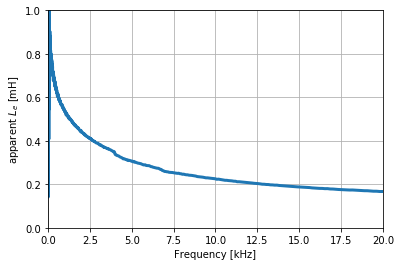

In [17]:
plt.plot(frequencies/1000, 1000*Le, linewidth=3);
plt.grid(True)
plt.xlabel('Frequency [kHz]')
plt.ylabel('apparent $L_e$ [mH]')
plt.xlim([0, 20])
plt.ylim([0, 1]);

## Mechanical part

### Mechancial Impedance $Z_{ma}$

In [18]:
# frequnecy region to 4kHz
idx_cut_modes = np.where(frequencies > 4000)[0][0]
freq_axis = frequencies[0:idx_cut_modes]
Zma = Bl*I[0:idx_cut_modes]/V[0:idx_cut_modes]

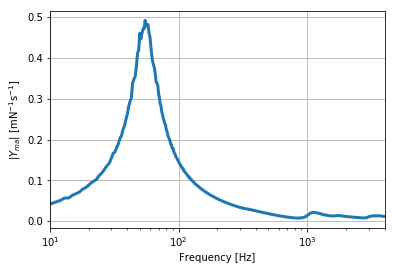

In [19]:
plt.semilogx(freq_axis, abs(1/Zma), linewidth=3)
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('$|Y_{ma}|$ [mN$^{-1}$s$^{-1}$]')
plt.xlim([10, 4e3]);

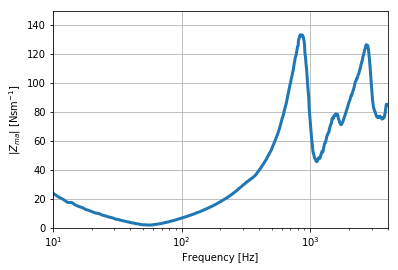

In [20]:
plt.semilogx(freq_axis, abs(Zma), linewidth=3)
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('$|Z_{ma}|$ [Nsm$^{-1}$]')
plt.xlim([10, 4e3])
plt.ylim([0, 150])
plt.savefig('Zm.pdf')

#### Remove the break-up behavior (vibrometer) at frequencies > 250Hz

In [21]:
idx_cut_breakup = np.where(frequencies > 250)[0][0]
Zma = Bl*I[0:idx_cut_breakup]/V[0:idx_cut_breakup] # cut all the values of V being over 250Hz
freq_axis_MECH = frequencies[0:idx_cut_breakup]
omega_MECH = 2*pi*freq_axis_MECH

### Mechanical parameters

The mechanical impedance is defined as

$$Z_{ma} = j \omega M_{ma} + R_{ma} + \dfrac{K_{ma}}{j \omega}$$

The real part of the mechanical impedance is

$$\text{real}\left(Z_{ma}\right) = R_{ma} $$



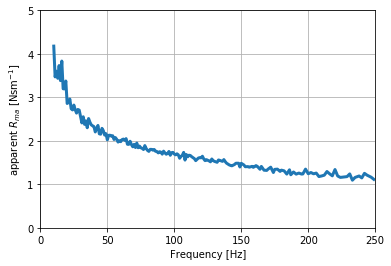

In [22]:
plt.plot(freq_axis_MECH, real(Zma), linewidth=3)
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('apparent $R_{ma}$ [Nsm$^{-1}$]')
plt.xlim([0, 250])
plt.ylim([0, 5]);

The imaginary part of the mechanical impedance is

$$\text{imag}\left(Z_{ma}\right) = \omega M_{ma} - \dfrac{K_{ma}}{\omega} $$

Two parameters $M_{ma}$ and $K_{ma}$ are on the same side ... problem.

Try the same technique as for $Bl$, supposing that $M_{ma}$ should be constant at the low frequency region (0-300 Hz)

$$K_{ma} = \omega^2 M_{ma} - \omega \,  \text{imag} \left(Z_{ma}\right)$$



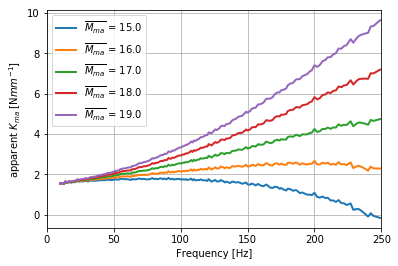

In [23]:
test_Mma= np.arange(15,20,1)
for Mma in test_Mma:
    Kma = omega_MECH**2*Mma/1000 - omega_MECH*imag(Zma)
    plt.plot(freq_axis_MECH, Kma/1000, linewidth=2)

plt.legend(["$\overline{M_{ma}}$ = %.1f" % x for x in test_Mma], loc='upper left')
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('apparent $K_{ma}$ [N$mm^{-1}$]')
plt.xlim([0, 250]);

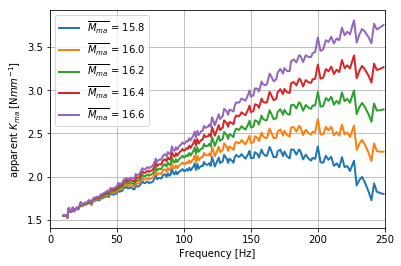

In [24]:
test_Mma= np.arange(15.8,16.6,.2)
for Mma in test_Mma:
    Kma = omega_MECH**2*Mma/1000 - omega_MECH*imag(Zma)
    plt.plot(freq_axis_MECH, Kma/1000, linewidth=2)

plt.legend(["$\overline{M_{ma}}$ = %.1f" % x for x in test_Mma], loc='upper left')
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('apparent $K_{ma}$ [N$mm^{-1}$]')
plt.xlim([0, 250]);